# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [10]:
# Create X and y 
y = df['Survived']
X = df.drop(['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [11]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED) 

In [12]:
# Fit the classifier
dt.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [13]:
# Make predictions using test set 
y_pred = dt.predict(X_test) 

In [15]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, )
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

In [42]:
# Create an array for max_depth values ranging from 1 - 32
max_depths = np.arange(1, 33, 1).tolist() 

In [45]:
# In a loop, train the classifier for each depth value (32 runs)
output = []
for num in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_depth=num)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    # Calculate the training and test AUC for each run
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    output.append(roc_auc)
output

[0.7389599317988065,
 0.7021028701335607,
 0.7477408354646207,
 0.7510088093208298,
 0.7520886615515772,
 0.7433930093776641,
 0.7651321398124469,
 0.7433930093776641,
 0.7412048877522024,
 0.7368570616652457,
 0.7575163398692811,
 0.7531400966183575,
 0.7455242966751917,
 0.7542199488491048,
 0.7552998010798522,
 0.7411480534242683,
 0.7433077578857629,
 0.7422279056550156,
 0.7454958795112248,
 0.7454958795112248,
 0.7324239840863881,
 0.7356919579425973,
 0.7356919579425973,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446,
 0.7367718101733446]

No handles with labels found to put in legend.


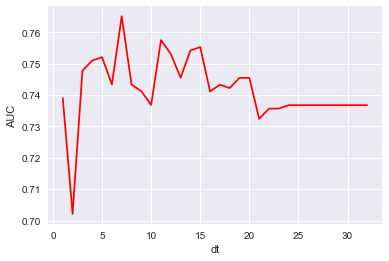

In [49]:
# Plot a graph to show under/overfitting and the optimal value
plt.plot(max_depths, output, 'r')
plt.ylabel('AUC')
plt.xlabel('dt')
plt.legend()
plt.show()

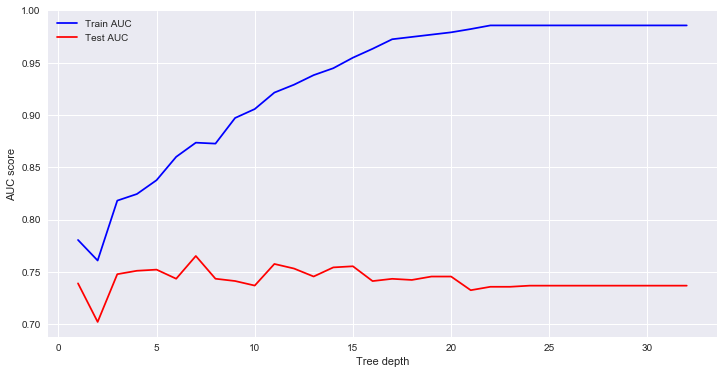

In [47]:
# Their code
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [20]:
# You observations here 
# Identify the optimal tree depth for given data
# Looks like the optimal tree depth is somewhere between to 2 and 4

In [ ]:
# Their code
# Training error decreases with increasing tree depth - clear sign of overfitting 
# Test error increases after depth=3 - nothing more to learn from deeper trees (some fluctuations, but not stable)
# Training and test errors rise rapidly between the depths of 2 and 3
# Optimal value seen here is 3

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

In [ ]:
# Identify the optimal min-samples-split for given data
min_sample_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for num in min_sample_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=num, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


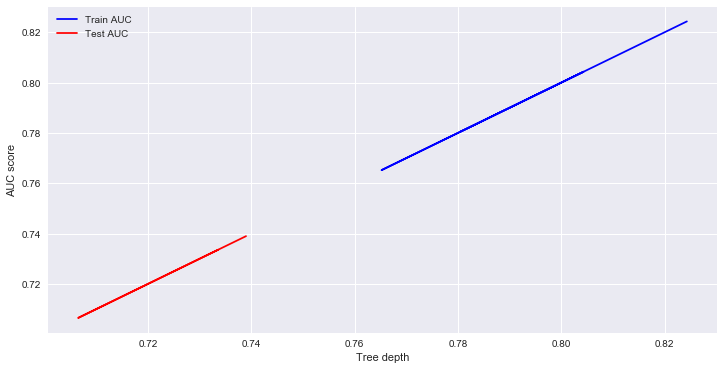

In [61]:
# Plot a graph to show under/overfitting and the optimal value
plt.figure(figsize=(12,6))
plt.plot(train_results, train_results, 'b', label='Train AUC')
plt.plot(test_results, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [ ]:
# Your observations here
# Looks like the split is between 0.74 and 0.765

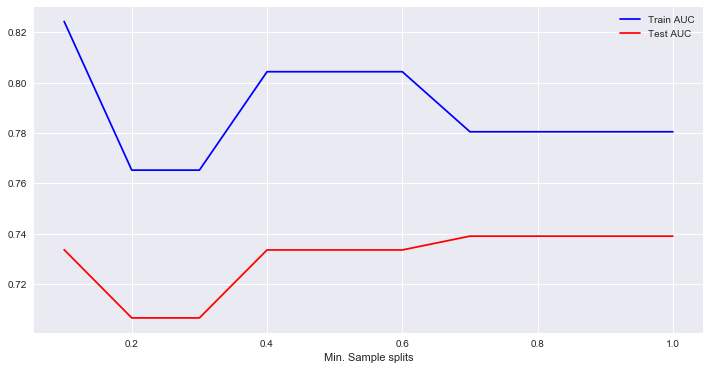

In [62]:
# Their code
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

In [ ]:
# Their code
# AUC for both test and train data stabilizes at 0.7 
# Further increase in minimum sample split does not improve learning 

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

In [67]:
# Calculate the optimal value for minimum sample leafs
min_sample_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for num in min_sample_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=num, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


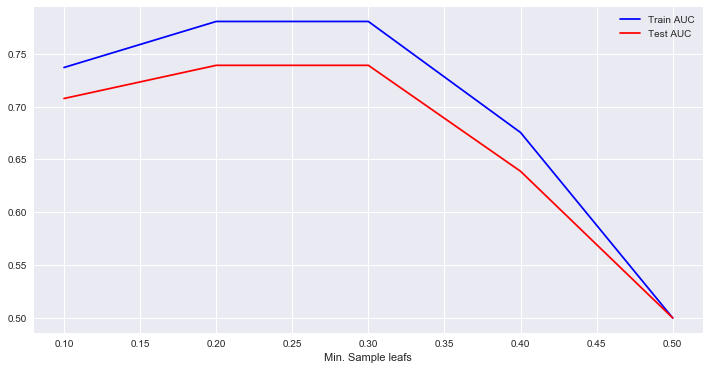

In [69]:
# Plot a graph to show under/overfitting and the optimal value
plt.figure(figsize=(12,6))
plt.plot(min_sample_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_sample_leafs, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample leafs')
plt.legend()
plt.show()

In [ ]:
# Your observations here 
# Leafs look good up until 0.4 or so

In [ ]:
# Their code
# AUC gives best value between 0.2 and 0.3 for both test and training sets 
# The accuracy drops down if we continue to increase the parameter value 

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

In [77]:
max_features = list(range(1, X_train.shape[1]))
max_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [78]:
X_train.shape[1]

12

In [84]:
max_features = np.linspace(1, 12, 12, endpoint=True)
max_features

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [87]:
# Calculate the optimal value for max features
max_features = [1,2,3,4,5,6,7,8,9,10,11]

train_results = []
test_results = []

for num in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=num, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


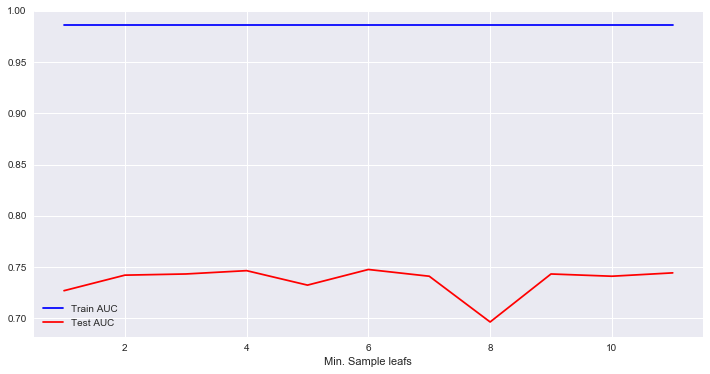

In [88]:
# Plot a graph to show under/overfitting and the optimal value
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample leafs')
plt.legend()
plt.show()

In [ ]:
# Your observations here
# at 8 leafs it dips down to 0.7, otherwise it's pretty constant

In [ ]:
# Their code
# No clear effect on the training dataset - flat AUC 
# Some fluctuations in test AUC but not definitive enough to make a judgement
# Highest AUC value seen at 6

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [89]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=0.7, min_samples_leaf=2.5, max_features=6, random_state=SEED)


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7443876101165104

In [ ]:
# You observations here
# Compared to the 0.7367718101733446, our new AUC of 0.7443876101165104 is only slightly better, after all that work

In [ ]:
# Their code
# We improved the AUC from 0.73 in the vanilla classifier to 0.74 with some tuning. 
# Due to randomness, results may slightly differ, there is some improvement in most cases. 
# With more complicated (and bigger) datasets, 
# we might see an even bigger improvement in AUC/accuracy of the classifier. 

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 